In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

def mass_center(fname):
    y, yt2, counts1 = [], [], []

    with open(fname, 'r') as fid:
        for row in fid:
            row = row.split()
            y.append(int(row[3]))
    yc, counts = np.unique(y, return_counts=True)    
    #print(yc)
    #print(counts)
    fiber_length = np.max(yc) - np.min(yc)
    # y of mass center
    yc0 = sorted(zip(yc, counts), key=lambda u: u[1], reverse=True)
    #print(yc0)
    #print(yc0[0][0])
    for i in range(len(yc0)):
        yt2.append(yc0[i][0])
        counts1.append(yc0[i][1])

    #print('length: %d' %fiber_length)

    return yc0, yt2, counts1, yc0[0][0], fiber_length

def transversal_section(fname, yc0, yc, arquivo):
   
    x, z = [], []
    with open(fname, 'r') as fid:
        for row in fid:
            row = row.split()
            y = int(row[3])
            
            if y == yc0:
                #print('entrou')
                #print(int(row[2]))
                x.append(int(row[2]))
                z.append(int(row[4]))

    xc, zc = np.mean(x), np.mean(z)
    #print(x)
    #print(z)
    #x = np.array(x)
    #z = np.array(z)
    #print(x)
    #print(z)
    x2 = np.power(x-xc,2)
    z2 = np.power(z-zc,2)
    radius = np.max(np.sqrt(x2+z2))
    #radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
    #radius = np.max(radius)
    #print(radius)
    #plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
    #plt.show()
    occup = float(len(x))
    A = float(np.pi*(radius**2))
    densitty = float(occup/A * 100)
    #print("massa: %f" % occup)
    #print("Area: %f" %A)
    #print("Densidade %.2f" % densitty)

    theta = np.linspace(0,2*np.pi,2000)
    x_ = xc+radius*np.cos(theta)
    y_ = zc+radius*np.sin(theta)

    plt.figure(figsize=(10,10))
    #plt.grid()
    plt.plot([xc],[zc],'s',color = 'firebrick', markersize = 12,zorder = 5,label = 'Centro') # Centro
    plt.plot(x,z,'s',color='darkslategray', markersize = 12,zorder = 1,label = 'Dados') # Dados
    #plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
    plt.axis('off')
    plt.xlim(-35,35)
    plt.ylim(-35,35)
    #plt.savefig("./img/"+arquivo[18:-3] + 'jpg', dpi=400)
    
    return x, z, xc, zc, radius, densitty



0
0
0
0


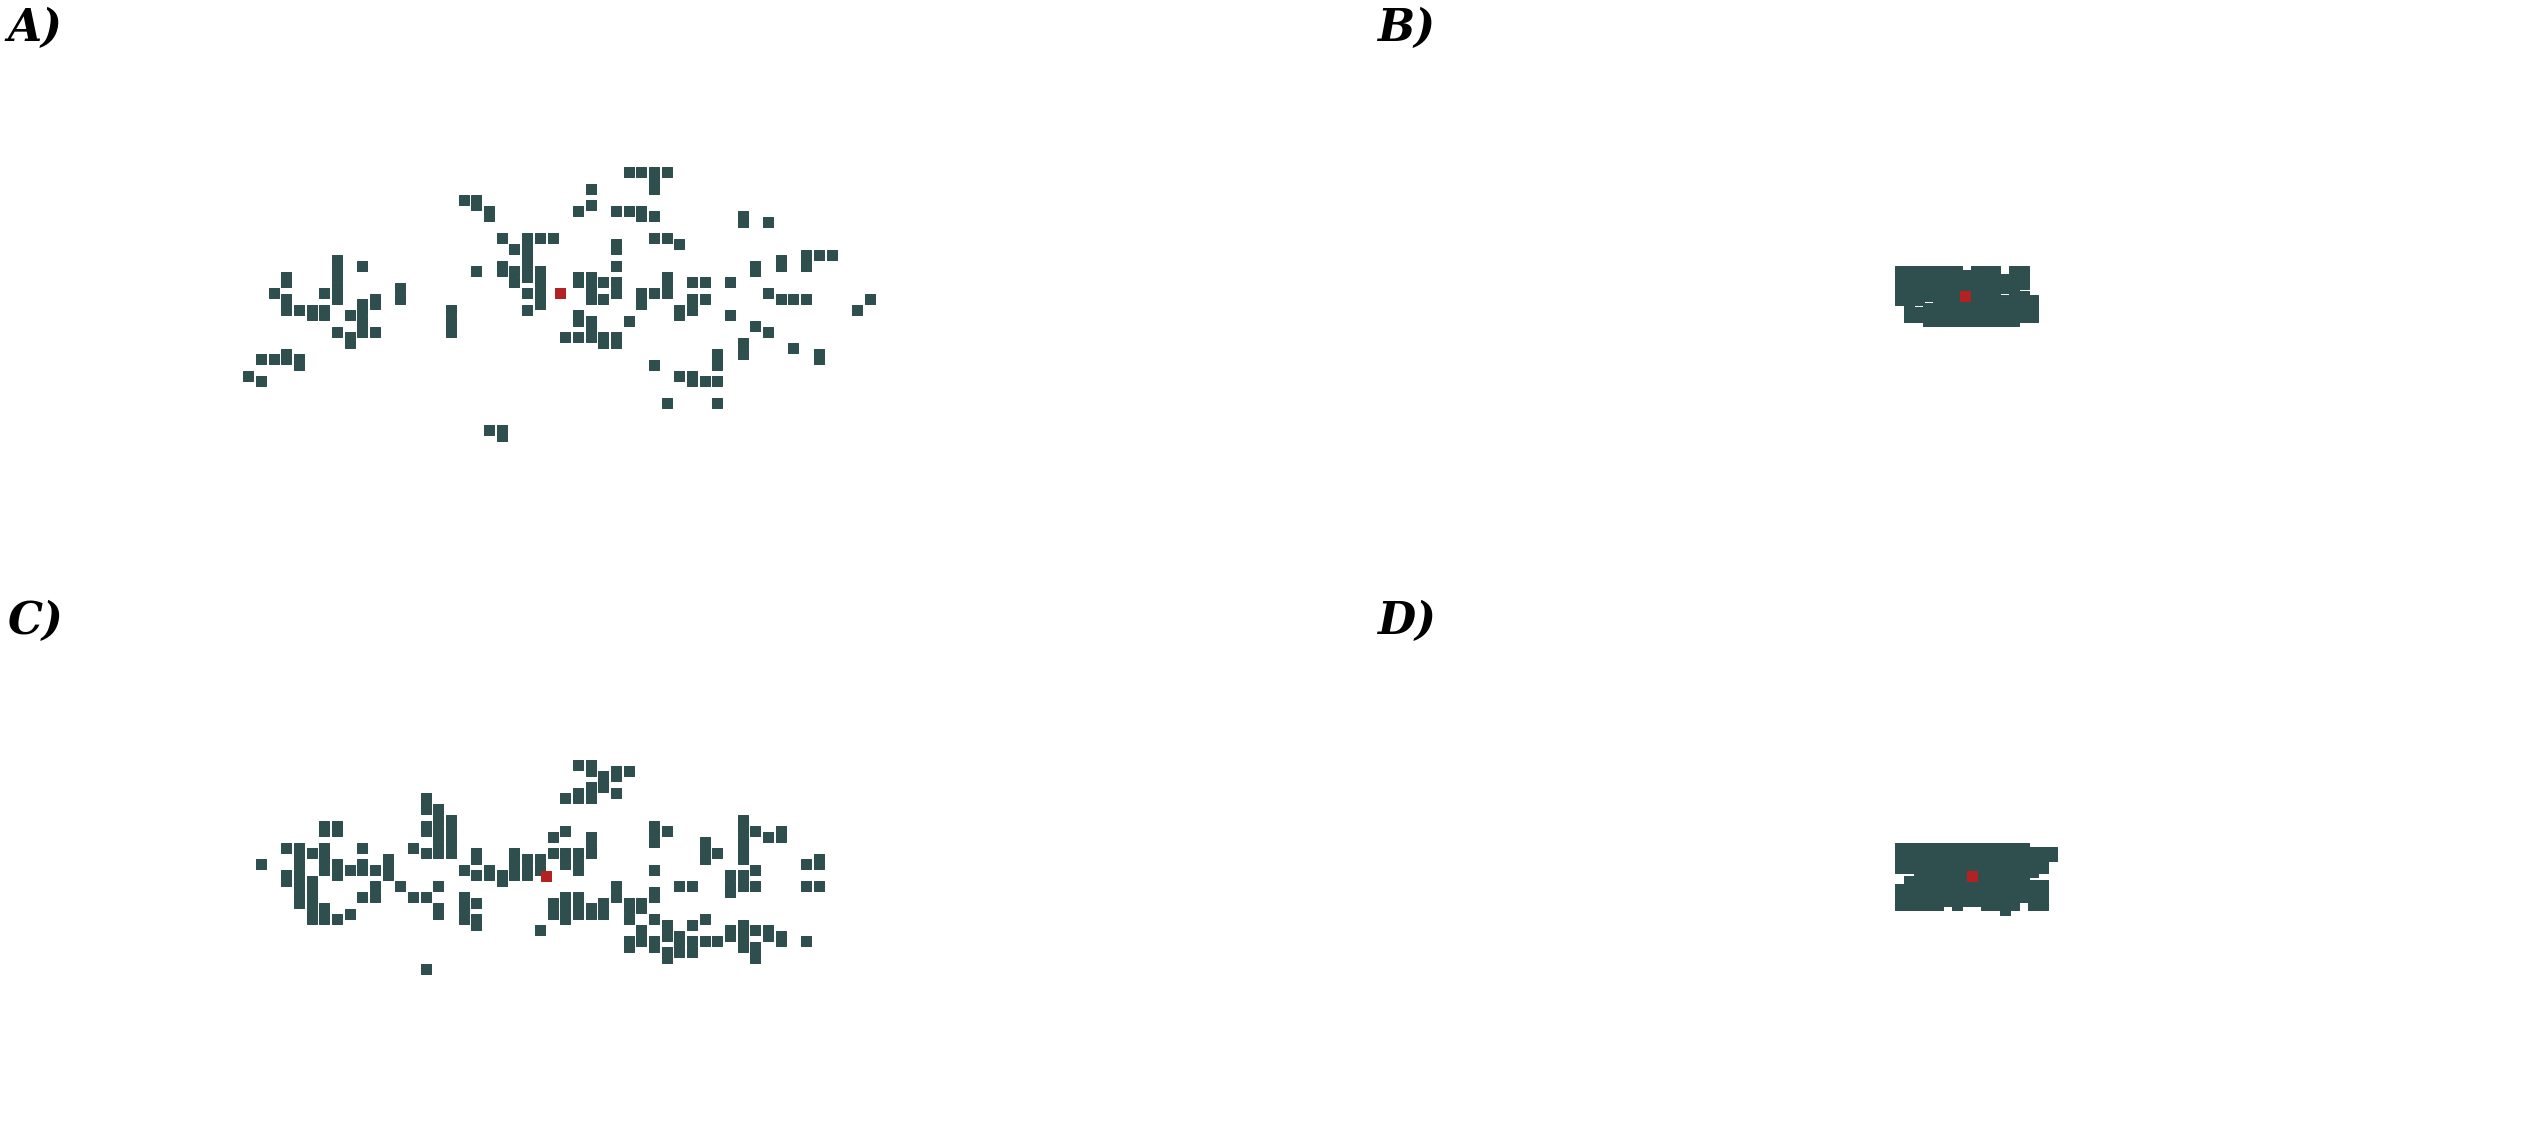

In [105]:
fig, axes = plt.subplots(2,2, figsize=(3*15,2*10))
fontlabel = {'family': 'serif',
        'color':  'black',
        'weight': 'heavy',
        'style': 'italic',
        'size': 44,
        }


files = ['mode_n_ts_1_nb_10000_seed_10_.dat', 'mode_n_ts_10000_nb_10000_seed_58_.dat','mode_s_ts_1_nb_10000_seed_30_.dat', 'mode_s_ts_10000_nb_10000_seed_70_.dat']

            
arquivo_ = ('./files/particles/%s' %files[0])
yt, yt2, counts, max, length = mass_center(arquivo_)
x, z ,cont = [], [],  0
yc0 = max
yc = yt
print(len(x))
with open(arquivo_, 'r') as fid:
    for row in fid:
        row = row.split()
        y = int(row[3])
        
        if y == yc0:
            #print('entrou')
            #print(int(row[2]))
            x.append(int(row[2]))
            z.append(int(row[4]))

xc, zc = np.mean(x), np.mean(z)
#print(x)
#print(z)
#x = np.array(x)
#z = np.array(z)
#print(x)
#print(z)
x2 = np.power(x-xc,2)
z2 = np.power(z-zc,2)
radius = np.max(np.sqrt(x2+z2))
#radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
#radius = np.max(radius)
#print(radius)
#plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
#plt.show()
occup = float(len(x))
A = float(np.pi*(radius**2))
densitty = float(occup/A * 100)
#print("massa: %f" % occup)
#print("Area: %f" %A)
#print("Densidade %.2f" % densitty)

theta = np.linspace(0,2*np.pi,2000)
x_ = xc+radius*np.cos(theta)
y_ = zc+radius*np.sin(theta)


#plt.grid()
if cont == 0:
    axes[0][0].scatter([xc],[zc],color = 'firebrick',s=85, zorder = 2, marker = 's') # Centro
    axes[0][0].scatter(x,z,color='darkslategray',s=85, marker = 's') # Dados
    axes[0][0].text(-45,45,'A)',fontdict=fontlabel)
    axes[0][0].set_xlim(-45,45)
    axes[0][0].set_ylim(-45,45)
    cont+=1

            
#plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
plt.axis('off')

#plt.savefig("./img/"+arquivo[18:-3] + 'jpg', dpi=400)
            
            
axes[0][0].axis('off')
axes[0][1].axis('off')
axes[1][0].axis('off')
axes[1][1].axis('off')
arquivo_ = ('./files/particles/%s' %files[1])
yt, yt2, counts, max, length = mass_center(arquivo_)
x, z ,cont = [], [],  0
yc0 = max
yc = yt
print(len(x))
with open(arquivo_, 'r') as fid:
    for row in fid:
        row = row.split()
        y = int(row[3])
        
        if y == yc0:
            #print('entrou')
            #print(int(row[2]))
            x.append(int(row[2]))
            z.append(int(row[4]))

xc, zc = np.mean(x), np.mean(z)
#print(x)
#print(z)
#x = np.array(x)
#z = np.array(z)
#print(x)
#print(z)
x2 = np.power(x-xc,2)
z2 = np.power(z-zc,2)
radius = np.max(np.sqrt(x2+z2))
#radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
#radius = np.max(radius)
#print(radius)
#plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
#plt.show()
occup = float(len(x))
A = float(np.pi*(radius**2))
densitty = float(occup/A * 100)
#print("massa: %f" % occup)
#print("Area: %f" %A)
#print("Densidade %.2f" % densitty)

theta = np.linspace(0,2*np.pi,2000)
x_ = xc+radius*np.cos(theta)
y_ = zc+radius*np.sin(theta)


#plt.grid()

axes[0][1].scatter([xc],[zc],color = 'firebrick',s=85, zorder = 2, marker = 's') # Centro
axes[0][1].scatter(x,z,color='darkslategray',s=85, marker = 's') # Dados
axes[0][1].set_xlim(-60,60)
axes[0][1].set_ylim(-60,60)
axes[0][1].text(-60,60,'B)',fontdict=fontlabel)

            
#plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
plt.axis('off')


#plt.grid()



arquivo_ = ('./files/particles/%s' %files[2])
yt, yt2, counts, max, length = mass_center(arquivo_)
x, z ,cont = [], [],  0
yc0 = max
yc = yt
print(len(x))
with open(arquivo_, 'r') as fid:
    for row in fid:
        row = row.split()
        y = int(row[3])
        
        if y == yc0:
            #print('entrou')
            #print(int(row[2]))
            x.append(int(row[2]))
            z.append(int(row[4]))

xc, zc = np.mean(x), np.mean(z)
#print(x)
#print(z)
#x = np.array(x)
#z = np.array(z)
#print(x)
#print(z)
x2 = np.power(x-xc,2)
z2 = np.power(z-zc,2)
radius = np.max(np.sqrt(x2+z2))
#radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
#radius = np.max(radius)
#print(radius)
#plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
#plt.show()
occup = float(len(x))
A = float(np.pi*(radius**2))
densitty = float(occup/A * 100)
#print("massa: %f" % occup)
#print("Area: %f" %A)
#print("Densidade %.2f" % densitty)

theta = np.linspace(0,2*np.pi,2000)
x_ = xc+radius*np.cos(theta)
y_ = zc+radius*np.sin(theta)


#plt.grid()

axes[1][0].scatter([xc],[zc],color = 'firebrick',s=85, zorder = 2, marker = 's') # Centro
axes[1][0].scatter(x,z,color='darkslategray',s=85, marker = 's') # Dados
axes[1][0].text(-45,45,'C)',fontdict=fontlabel)

            
#plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
plt.axis('off')
axes[1][0].set_xlim(-45,45)
axes[1][0].set_ylim(-45,45)

arquivo_ = ('./files/particles/%s' %files[3])
yt, yt2, counts, max, length = mass_center(arquivo_)
x, z ,cont = [], [],  0
yc0 = max
yc = yt
print(len(x))
with open(arquivo_, 'r') as fid:
    for row in fid:
        row = row.split()
        y = int(row[3])
        
        if y == yc0:
            #print('entrou')
            #print(int(row[2]))
            x.append(int(row[2]))
            z.append(int(row[4]))

xc, zc = np.mean(x), np.mean(z)
#print(x)
#print(z)
#x = np.array(x)
#z = np.array(z)
#print(x)
#print(z)
x2 = np.power(x-xc,2)
z2 = np.power(z-zc,2)
radius = np.max(np.sqrt(x2+z2))
#radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
#radius = np.max(radius)
#print(radius)
#plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
#plt.show()
occup = float(len(x))
A = float(np.pi*(radius**2))
densitty = float(occup/A * 100)
#print("massa: %f" % occup)
#print("Area: %f" %A)
#print("Densidade %.2f" % densitty)

theta = np.linspace(0,2*np.pi,2000)
x_ = xc+radius*np.cos(theta)
y_ = zc+radius*np.sin(theta)


#plt.grid()

axes[1][1].scatter([xc],[zc],color = 'firebrick',s=85, zorder = 2, marker = 's') # Centro
axes[1][1].scatter(x,z,color='darkslategray',s=85, marker = 's') # Dados
axes[1][1].text(-60,60,'D)',fontdict=fontlabel)

            
#plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
plt.axis('off')
axes[1][1].set_xlim(-60,60)
axes[1][1].set_ylim(-60,60)

fig.savefig("cross_section_non.jpg", dpi=400)

0
0
0
0
0


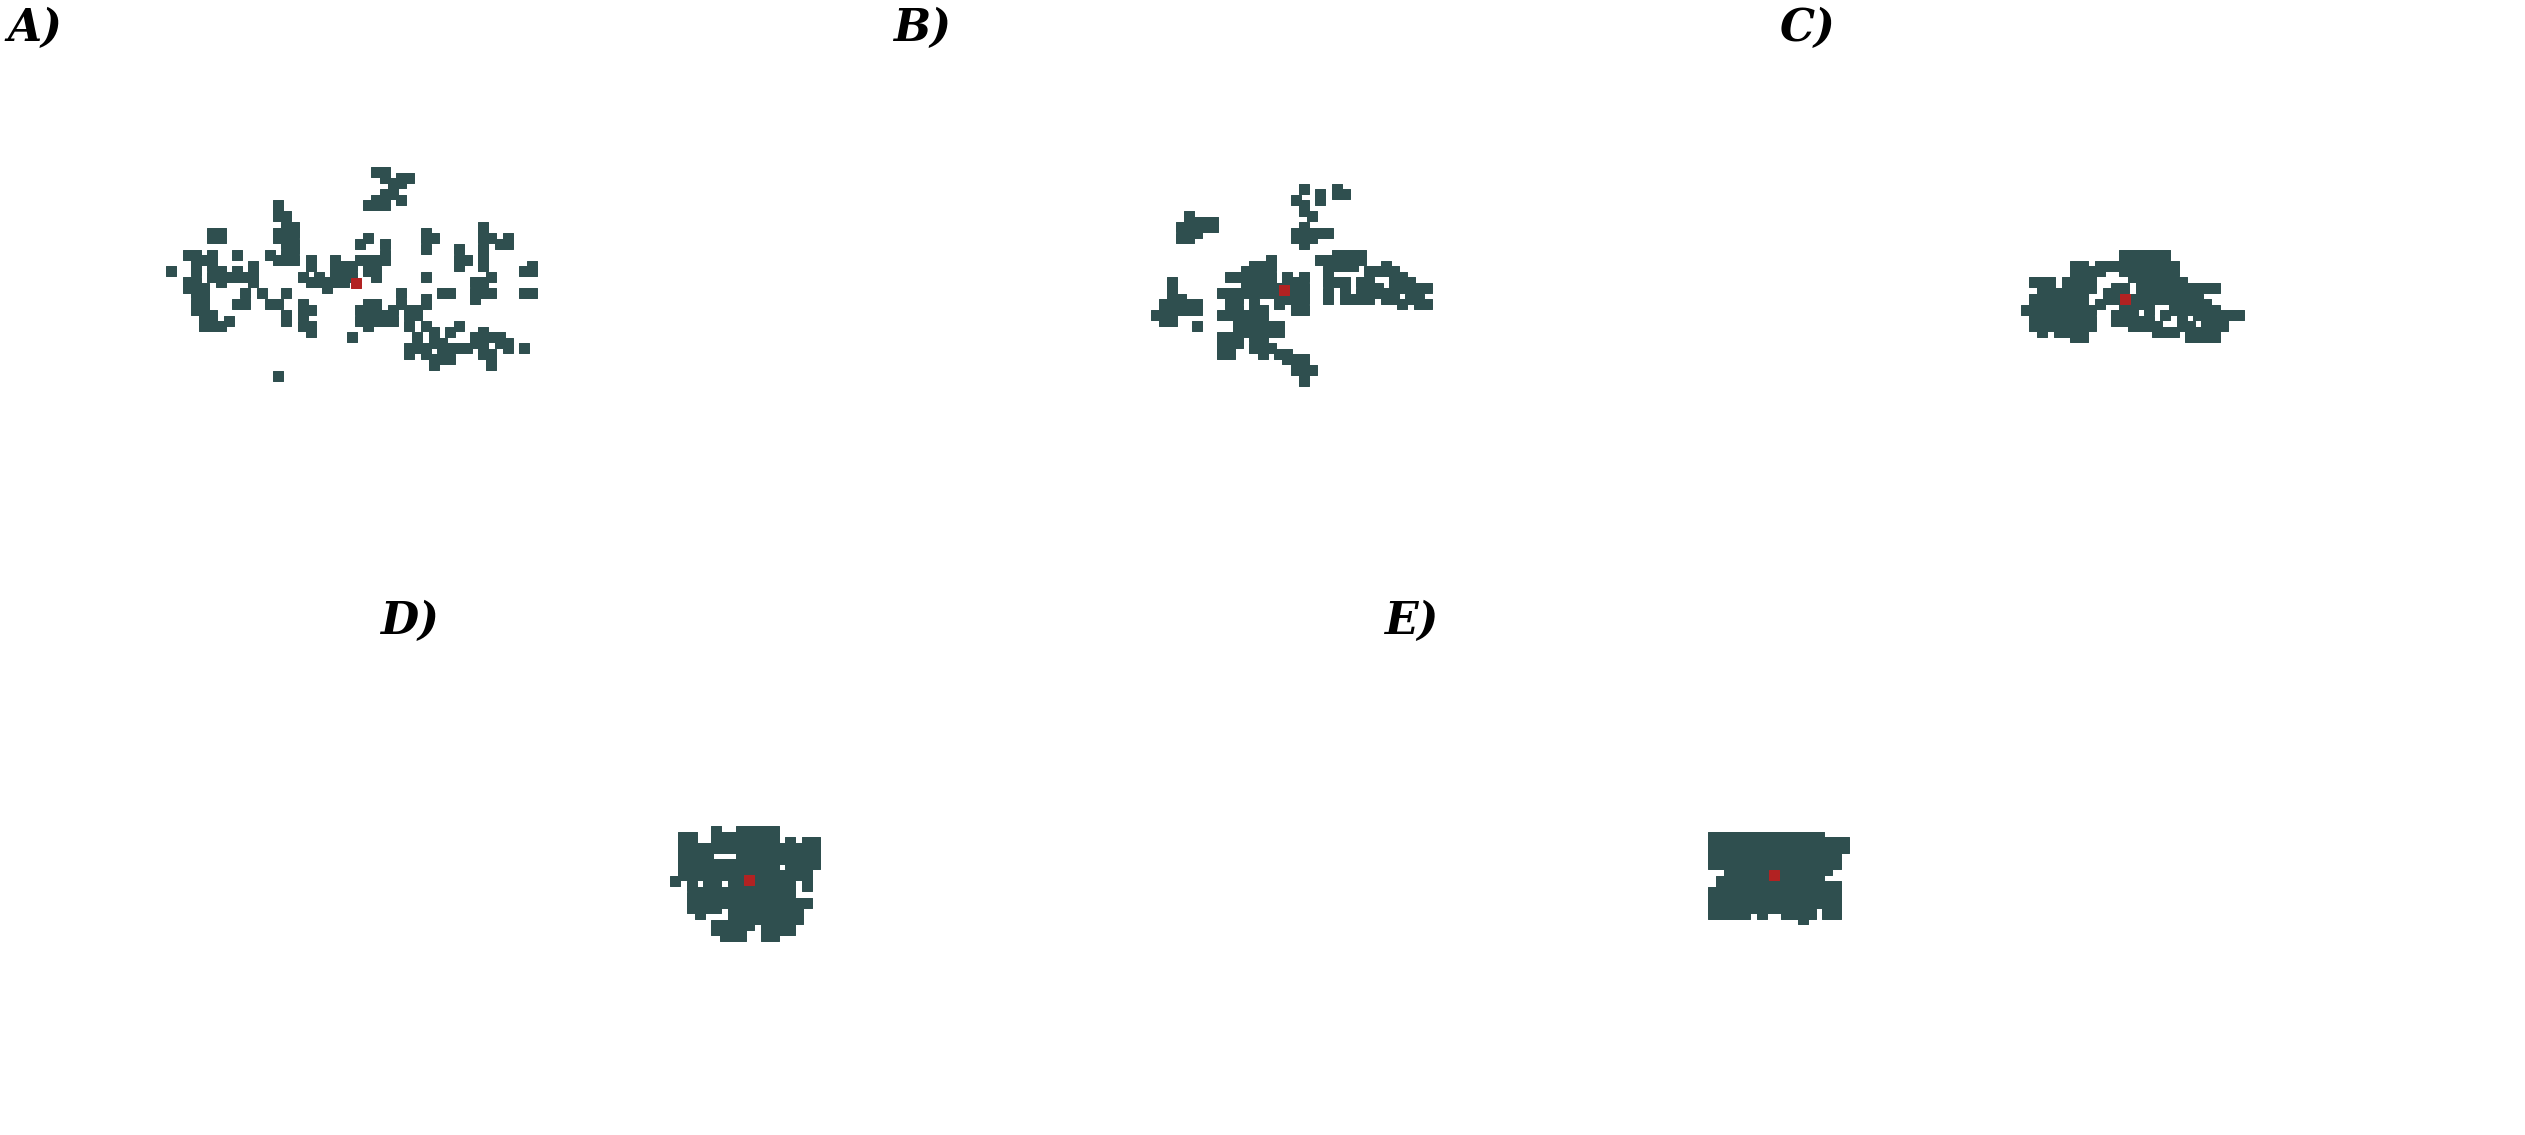

In [98]:
fig, axes = plt.subplots(2,3, figsize=(3*15,2*10))
fontlabel = {'family': 'serif',
        'color':  'black',
        'weight': 'heavy',
        'style': 'italic',
        'size': 44,
        }


axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
files = ['mode_s_ts_1_nb_10000_seed_30_.dat', 'mode_s_ts_10000_nb_10000_seed_70_.dat']

            
arquivo_ = ('./files/particles/%s' %files[0])
yt, yt2, counts, max, length = mass_center(arquivo_)
x, z ,cont = [], [],  0
yc0 = max
yc = yt
print(len(x))
with open(arquivo_, 'r') as fid:
    for row in fid:
        row = row.split()
        y = int(row[3])
        
        if y == yc0:
            #print('entrou')
            #print(int(row[2]))
            x.append(int(row[2]))
            z.append(int(row[4]))

xc, zc = np.mean(x), np.mean(z)
#print(x)
#print(z)
#x = np.array(x)
#z = np.array(z)
#print(x)
#print(z)
x2 = np.power(x-xc,2)
z2 = np.power(z-zc,2)
radius = np.max(np.sqrt(x2+z2))
#radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
#radius = np.max(radius)
#print(radius)
#plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
#plt.show()
occup = float(len(x))
A = float(np.pi*(radius**2))
densitty = float(occup/A * 100)
#print("massa: %f" % occup)
#print("Area: %f" %A)
#print("Densidade %.2f" % densitty)

theta = np.linspace(0,2*np.pi,2000)
x_ = xc+radius*np.cos(theta)
y_ = zc+radius*np.sin(theta)


#plt.grid()
if cont == 0:
    axes[0][0].scatter([xc],[zc],color = 'firebrick',s=85, zorder = 2, marker = 's') # Centro
    axes[0][0].scatter(x,z,color='darkslategray',s=85, marker = 's') # Dados
    axes[0][0].text(-45,45,'A)',fontdict=fontlabel)
    axes[0][0].set_xlim(-45,45)
    axes[0][0].set_ylim(-45,45)
    cont+=1

            
#plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
plt.axis('off')

#plt.savefig("./img/"+arquivo[18:-3] + 'jpg', dpi=400)
            
            
axes[0][0].axis('off')
axes[0][1].axis('off')
axes[0][2].axis('off')
axes[1][0].axis('off')
axes[1][1].axis('off')
arquivo_ = ('./files/particles/%s' %files[1])
yt, yt2, counts, max, length = mass_center(arquivo_)
x, z ,cont = [], [],  0
yc0 = max
yc = yt
print(len(x))
with open(arquivo_, 'r') as fid:
    for row in fid:
        row = row.split()
        y = int(row[3])
        
        if y == yc0:
            #print('entrou')
            #print(int(row[2]))
            x.append(int(row[2]))
            z.append(int(row[4]))

xc, zc = np.mean(x), np.mean(z)
#print(x)
#print(z)
#x = np.array(x)
#z = np.array(z)
#print(x)
#print(z)
x2 = np.power(x-xc,2)
z2 = np.power(z-zc,2)
radius = np.max(np.sqrt(x2+z2))
#radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
#radius = np.max(radius)
#print(radius)
#plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
#plt.show()
occup = float(len(x))
A = float(np.pi*(radius**2))
densitty = float(occup/A * 100)
#print("massa: %f" % occup)
#print("Area: %f" %A)
#print("Densidade %.2f" % densitty)

theta = np.linspace(0,2*np.pi,2000)
x_ = xc+radius*np.cos(theta)
y_ = zc+radius*np.sin(theta)


#plt.grid()

axes[0][1].scatter([xc],[zc],color = 'firebrick',s=85, zorder = 2, marker = 's') # Centro
axes[0][1].scatter(x,z,color='darkslategray',s=85, marker = 's') # Dados
axes[0][1].set_xlim(-45,45)
axes[0][1].set_ylim(-45,45)
axes[0][1].text(-45,45,'B)',fontdict=fontlabel)

            
#plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
plt.axis('off')

arquivo_ = ('./files/particles/%s' %files[2])
yt, yt2, counts, max, length = mass_center(arquivo_)
x, z ,cont = [], [],  0
yc0 = max
yc = yt
print(len(x))
with open(arquivo_, 'r') as fid:
    for row in fid:
        row = row.split()
        y = int(row[3])
        
        if y == yc0:
            #print('entrou')
            #print(int(row[2]))
            x.append(int(row[2]))
            z.append(int(row[4]))

xc, zc = np.mean(x), np.mean(z)
#print(x)
#print(z)
#x = np.array(x)
#z = np.array(z)
#print(x)
#print(z)
x2 = np.power(x-xc,2)
z2 = np.power(z-zc,2)
radius = np.max(np.sqrt(x2+z2))
#radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
#radius = np.max(radius)
#print(radius)
#plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
#plt.show()
occup = float(len(x))
A = float(np.pi*(radius**2))
densitty = float(occup/A * 100)
#print("massa: %f" % occup)
#print("Area: %f" %A)
#print("Densidade %.2f" % densitty)

theta = np.linspace(0,2*np.pi,2000)
x_ = xc+radius*np.cos(theta)
y_ = zc+radius*np.sin(theta)


#plt.grid()

axes[0][2].scatter([xc],[zc],color = 'firebrick',s=85, zorder = 2, marker = 's') # Centro
axes[0][2].scatter(x,z,color='darkslategray',s=85, marker = 's') # Dados
axes[0][2].text(-45,45,'C)',fontdict=fontlabel)

            
#plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
plt.axis('off')
axes[0][2].set_xlim(-45,45)
axes[0][2].set_ylim(-45,45)

arquivo_ = ('./files/particles/%s' %files[3])
yt, yt2, counts, max, length = mass_center(arquivo_)
x, z ,cont = [], [],  0
yc0 = max
yc = yt
print(len(x))
with open(arquivo_, 'r') as fid:
    for row in fid:
        row = row.split()
        y = int(row[3])
        
        if y == yc0:
            #print('entrou')
            #print(int(row[2]))
            x.append(int(row[2]))
            z.append(int(row[4]))

xc, zc = np.mean(x), np.mean(z)
#print(x)
#print(z)
#x = np.array(x)
#z = np.array(z)
#print(x)
#print(z)
x2 = np.power(x-xc,2)
z2 = np.power(z-zc,2)
radius = np.max(np.sqrt(x2+z2))
#radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
#radius = np.max(radius)
#print(radius)
#plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
#plt.show()
occup = float(len(x))
A = float(np.pi*(radius**2))
densitty = float(occup/A * 100)
#print("massa: %f" % occup)
#print("Area: %f" %A)
#print("Densidade %.2f" % densitty)

theta = np.linspace(0,2*np.pi,2000)
x_ = xc+radius*np.cos(theta)
y_ = zc+radius*np.sin(theta)


#plt.grid()

axes[1][0].scatter([xc],[zc],color = 'firebrick',s=85, zorder = 2, marker = 's') # Centro
axes[1][0].scatter(x,z,color='darkslategray',s=85, marker = 's') # Dados
axes[1][0].text(-45,45,'D)',fontdict=fontlabel)

            
#plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
plt.axis('off')
axes[1][0].set_xlim(-45,45)
axes[1][0].set_ylim(-45,45)

arquivo_ = ('./files/particles/%s' %files[4])
yt, yt2, counts, max, length = mass_center(arquivo_)
x, z ,cont = [], [],  0
yc0 = max
yc = yt
print(len(x))
with open(arquivo_, 'r') as fid:
    for row in fid:
        row = row.split()
        y = int(row[3])
        
        if y == yc0:
            #print('entrou')
            #print(int(row[2]))
            x.append(int(row[2]))
            z.append(int(row[4]))

xc, zc = np.mean(x), np.mean(z)
#print(x)
#print(z)
#x = np.array(x)
#z = np.array(z)
#print(x)
#print(z)
x2 = np.power(x-xc,2)
z2 = np.power(z-zc,2)
radius = np.max(np.sqrt(x2+z2))
#radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
#radius = np.max(radius)
#print(radius)
#plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
#plt.show()
occup = float(len(x))
A = float(np.pi*(radius**2))
densitty = float(occup/A * 100)
#print("massa: %f" % occup)
#print("Area: %f" %A)
#print("Densidade %.2f" % densitty)

theta = np.linspace(0,2*np.pi,2000)
x_ = xc+radius*np.cos(theta)
y_ = zc+radius*np.sin(theta)


#plt.grid()

axes[1][1].scatter([xc],[zc],color = 'firebrick',s=85, zorder = 2, marker = 's') # Centro
axes[1][1].scatter(x,z,color='darkslategray',s=85, marker = 's') # Dados
axes[1][1].text(-45,45,'E)',fontdict=fontlabel)

            
#plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
plt.axis('off')
axes[1][1].set_xlim(-45,45)
axes[1][1].set_ylim(-45,45)

fig.savefig("cross_section_specific.png", dpi=400)

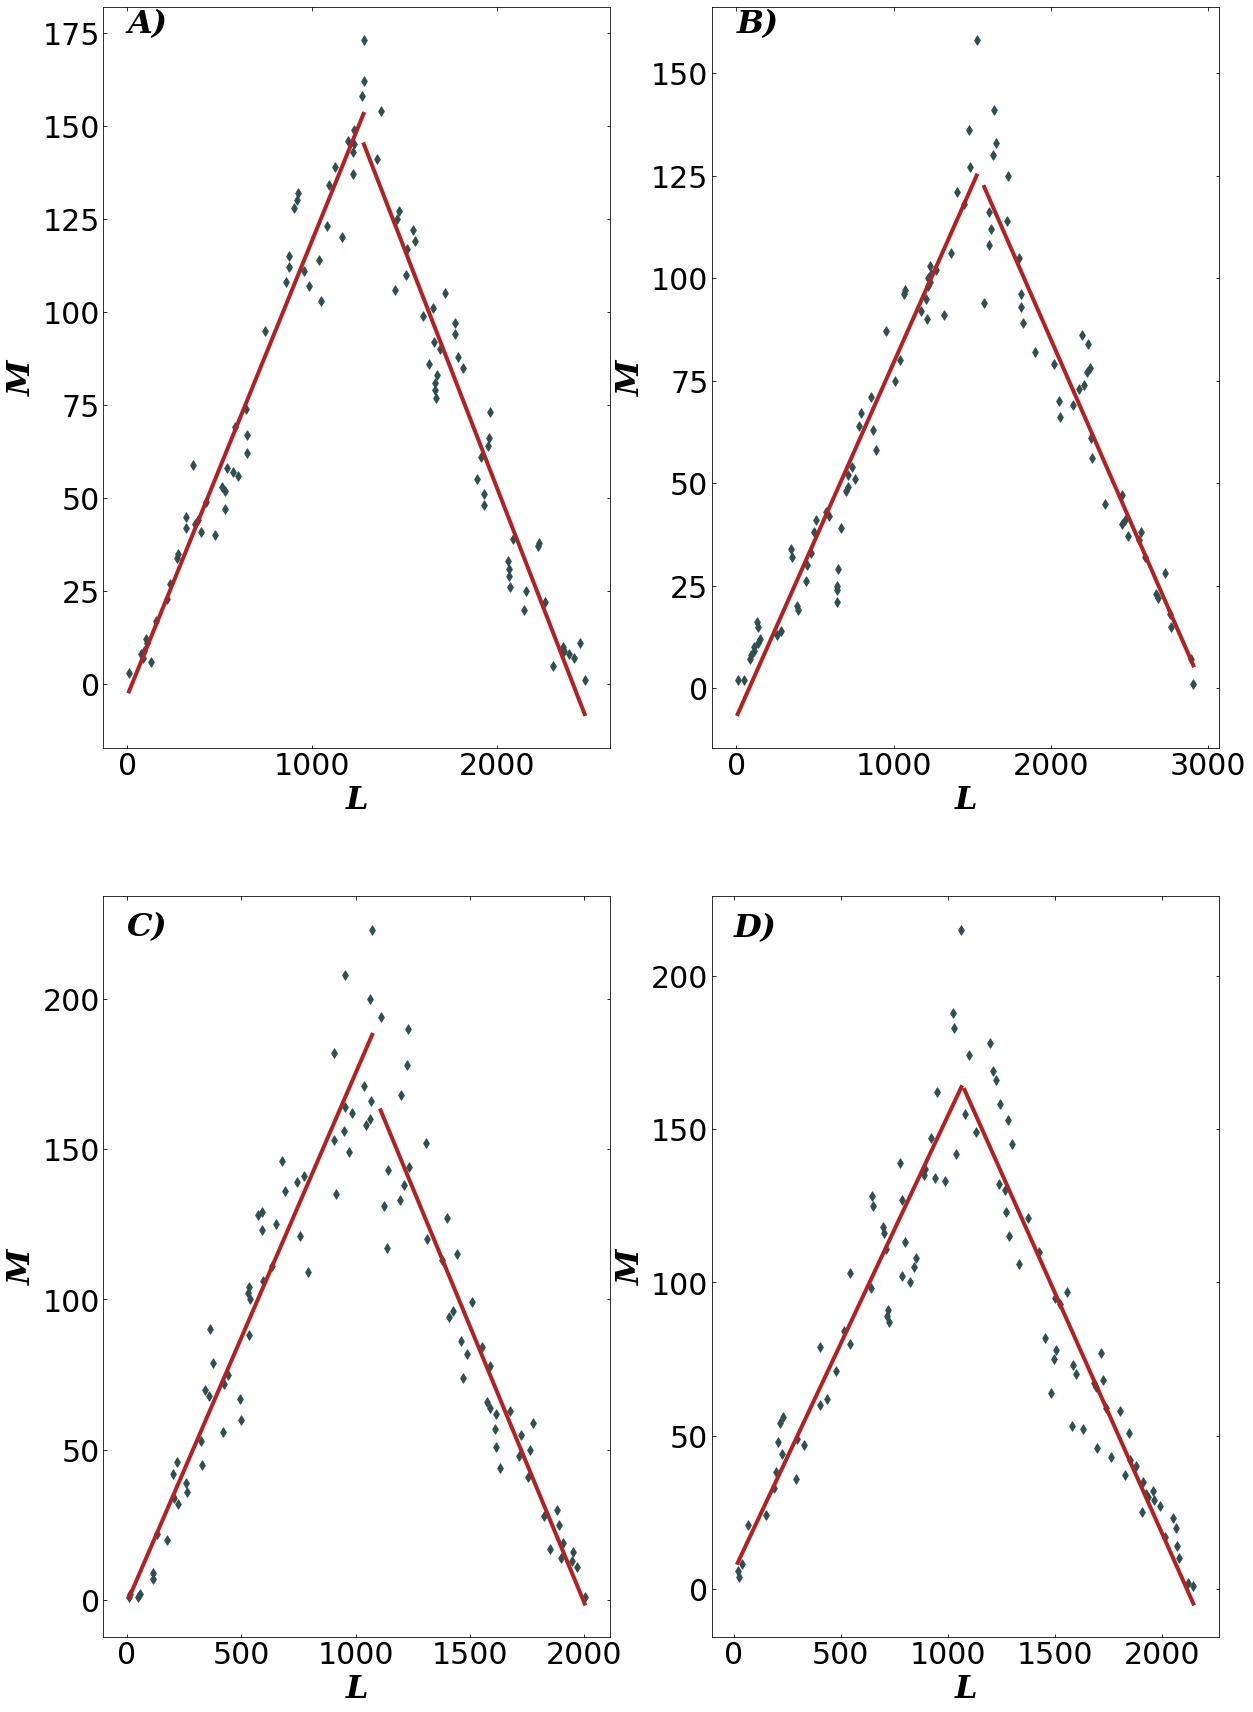

In [106]:
fig, axes = plt.subplots(2,2, figsize=(2*10,2*15))

num = 100

files = ['mode_n_ts_1_nb_10000_seed_10_.dat', 'mode_n_ts_10000_nb_10000_seed_58_.dat','mode_s_ts_1_nb_10000_seed_30_.dat', 'mode_s_ts_10000_nb_10000_seed_70_.dat']

fontlabel = {'family': 'serif',
    'color':  'black',
    'weight': 'heavy',
    'style': 'italic',
    'size': 32,
    }
arquivo_ = ('./files/particles/%s' %files[0])
yt, yt2, counts, max, length = mass_center(arquivo_)

yt = yt2
yleft = []
yright = []
xleft = []
xright = []
#print(yt)


idx = np.round(np.linspace(0, len(yt) - 1, num)).astype(int)


for j in idx:

    #print(type(int(j)))
    axes[0][0].scatter(yt[int(j)] - np.min(yt), counts[int(j)], color = 'darkslategray', s = 44, marker = 'd', zorder = 1)
    #print(yt[j] - min(yt))
    #print(counts[j])

    if yt[j] > max:
        yright.append(counts[j])
        xright.append(yt[j] - np.min(yt))

    else:
        yleft.append(counts[j])
        xleft.append(yt[j] - np.min(yt))
    

#plt.xlim(0,2200)
#plt.ylim(0,210)

## Lado esquerdo 
yleft=np.array(yleft)
xleft=np.array(xleft)
xleft = xleft.reshape(-1,1)
yleft = yleft.reshape(-1,1)


## Lado direito
yright=np.array(yright)
xright=np.array(xright)
xright = xright.reshape(-1,1)
yright = yright.reshape(-1,1)


reg = LinearRegression().fit(xleft, yleft)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
Y = Y[0]

reg = LinearRegression().fit(xright, yright)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
Yy = Yy[0]
axes[0][0].plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y,color = 'firebrick', linewidth = 4, zorder = 5)
axes[0][0].plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy,color = 'firebrick', linewidth = 4,zorder = 5)
axes[0][0].set_xlabel('L',fontdict=fontlabel)
axes[0][0].set_ylabel("M",fontdict=fontlabel)
axes[0][0].tick_params(axis="x", labelsize=30, tickdir = 'in', bottom = True, top = True)
axes[0][0].tick_params(axis="y", labelsize=30,tickdir = 'in', left = True, right = True)

arquivo_ = ('./files/particles/%s' %files[1])
yt, yt2, counts, max, length = mass_center(arquivo_)

yt = yt2
yleft = []
yright = []
xleft = []
xright = []
#print(yt)


idx = np.round(np.linspace(0, len(yt) - 1, num)).astype(int)


for j in idx:

    #print(type(int(j)))
    axes[0][1].scatter(yt[int(j)] - np.min(yt), counts[int(j)], color = 'darkslategray', s = 44, marker = 'd', zorder = 1)
    #print(yt[j] - min(yt))
    #print(counts[j])

    if yt[j] > max:
        yright.append(counts[j])
        xright.append(yt[j] - np.min(yt))

    else:
        yleft.append(counts[j])
        xleft.append(yt[j] - np.min(yt))
    

#plt.xlim(0,2200)
#plt.ylim(0,210)

## Lado esquerdo 
yleft=np.array(yleft)
xleft=np.array(xleft)
xleft = xleft.reshape(-1,1)
yleft = yleft.reshape(-1,1)


## Lado direito
yright=np.array(yright)
xright=np.array(xright)
xright = xright.reshape(-1,1)
yright = yright.reshape(-1,1)


reg = LinearRegression().fit(xleft, yleft)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
Y = Y[0]

reg = LinearRegression().fit(xright, yright)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
Yy = Yy[0]
axes[0][1].plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y,color = 'firebrick', linewidth = 4, zorder = 5)
axes[0][1].plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy,color = 'firebrick', linewidth = 4,zorder = 5)
axes[0][1].set_xlabel('L',fontdict=fontlabel)
axes[0][1].set_ylabel("M",fontdict=fontlabel)
axes[0][1].tick_params(axis="x", labelsize=30, tickdir = 'in', bottom = True, top = True)
axes[0][1].tick_params(axis="y", labelsize=30,tickdir = 'in', left = True, right = True)

arquivo_ = ('./files/particles/%s' %files[2])
yt, yt2, counts, max, length = mass_center(arquivo_)

yt = yt2
yleft = []
yright = []
xleft = []
xright = []
#print(yt)


idx = np.round(np.linspace(0, len(yt) - 1, num)).astype(int)


for j in idx:

    #print(type(int(j)))
    axes[1][0].scatter(yt[int(j)] - np.min(yt), counts[int(j)], color = 'darkslategray', s = 44, marker = 'd', zorder = 1)
    #print(yt[j] - min(yt))
    #print(counts[j])

    if yt[j] > max:
        yright.append(counts[j])
        xright.append(yt[j] - np.min(yt))

    else:
        yleft.append(counts[j])
        xleft.append(yt[j] - np.min(yt))
    

#plt.xlim(0,2200)
#plt.ylim(0,210)

## Lado esquerdo 
yleft=np.array(yleft)
xleft=np.array(xleft)
xleft = xleft.reshape(-1,1)
yleft = yleft.reshape(-1,1)


## Lado direito
yright=np.array(yright)
xright=np.array(xright)
xright = xright.reshape(-1,1)
yright = yright.reshape(-1,1)


reg = LinearRegression().fit(xleft, yleft)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
Y = Y[0]

reg = LinearRegression().fit(xright, yright)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
Yy = Yy[0]
axes[1][0].plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y,color = 'firebrick', linewidth = 4, zorder = 5)
axes[1][0].plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy,color = 'firebrick', linewidth = 4,zorder = 5)
axes[1][0].set_xlabel('L',fontdict=fontlabel)
axes[1][0].set_ylabel("M",fontdict=fontlabel)
axes[1][0].tick_params(axis="x", labelsize=30, tickdir = 'in', bottom = True, top = True)
axes[1][0].tick_params(axis="y", labelsize=30,tickdir = 'in', left = True, right = True)

arquivo_ = ('./files/particles/%s' %files[3])
yt, yt2, counts, max, length = mass_center(arquivo_)

yt = yt2
yleft = []
yright = []
xleft = []
xright = []
#print(yt)


idx = np.round(np.linspace(0, len(yt) - 1, num)).astype(int)


for j in idx:

    #print(type(int(j)))
    axes[1][1].scatter(yt[int(j)] - np.min(yt), counts[int(j)], color = 'darkslategray', s = 44, marker = 'd', zorder = 1)
    #print(yt[j] - min(yt))
    #print(counts[j])

    if yt[j] > max:
        yright.append(counts[j])
        xright.append(yt[j] - np.min(yt))

    else:
        yleft.append(counts[j])
        xleft.append(yt[j] - np.min(yt))
    

#plt.xlim(0,2200)
#plt.ylim(0,210)

## Lado esquerdo 
yleft=np.array(yleft)
xleft=np.array(xleft)
xleft = xleft.reshape(-1,1)
yleft = yleft.reshape(-1,1)


## Lado direito
yright=np.array(yright)
xright=np.array(xright)
xright = xright.reshape(-1,1)
yright = yright.reshape(-1,1)


reg = LinearRegression().fit(xleft, yleft)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
Y = Y[0]

reg = LinearRegression().fit(xright, yright)
#print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
Yy = Yy[0]
axes[1][1].plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y,color = 'firebrick', linewidth = 4, zorder = 5)
axes[1][1].plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy,color = 'firebrick', linewidth = 4,zorder = 5)
axes[1][1].set_xlabel('L',fontdict=fontlabel)
axes[1][1].set_ylabel("M",fontdict=fontlabel)
axes[1][1].tick_params(axis="x", labelsize=30, tickdir = 'in', bottom = True, top = True)
axes[1][1].tick_params(axis="y", labelsize=30,tickdir = 'in', left = True, right = True)

axes[0][0].text(0,175,'A)',fontdict=fontlabel)
axes[0][1].text(0,160,'B)',fontdict=fontlabel)
axes[1][0].text(0,221,'C)',fontdict=fontlabel)
axes[1][1].text(0,213,'D)',fontdict=fontlabel)

fig.savefig("mass_per_lenght.png", dpi=400)
